In [107]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import math
import os
import scipy

In [2]:
def load_pointset(path: str) -> ([], []):
    xs = []
    ys = []
    
    with open(path, 'r') as points_file:
        for line in points_file.readlines()[1:]:
            x, y = line.split(" ")
            y.replace("\n", "")
            
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [3]:
def load_spectrum_to_matrix(freqpath: str) -> np.ndarray:
    minfreq = 1.0e36
    maxfreq = 0.0
    
    freqs = []
    
    with open(freqpath, 'r') as spectrum:
        dimension = int(spectrum.readline())
        for line in spectrum.readlines():
            freqs.append(float(line))
            minfreq = min(float(line), minfreq)
            maxfreq = max(float(line), maxfreq)
    
    matrix = np.zeros((dimension, dimension))
    
    for row in range(dimension):
        for col in range(dimension):
            frequency = freqs[row * dimension + col]
            # normalize
            #frequency = (frequency - minfreq) / (maxfreq - minfreq)
            frequency = math.sqrt(frequency / maxfreq);
            matrix[row][col] = frequency
    return matrix

In [4]:
def load_pcf(pcfpath: str) -> ([],[]):
    xs = []
    ys = []
    with open(pcfpath, 'r') as pcffile:
        for line in pcffile.readlines():
            ys.append(float(line))
    xs = range(len(ys))

    return (xs, ys)

In [5]:
def load_radspec(specpath: str) -> ([], []):
    xs = []
    ys = []

    with open(specpath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(", ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [6]:
def load_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for  pcffilename in pcffiles:
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_pcf(os.path.join(folderpath, pcffilename))


    return values

In [7]:
def load_heck_pcf(filepath):
    xs = []
    ys = []

    with open(filepath, 'r') as specfile:
        for line in specfile.readlines():
            x, y = line.split(" ")
            xs.append(float(x))
            ys.append(float(y))
    return (xs, ys)

In [8]:
def load_heck_pcfseries(folderpath):
    pcffiles = os.listdir(folderpath)
    values = {}

    for pcffilename in pcffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, pcffilename))
        if file_extension != ".txt":
            continue
        cutoff = pcffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_heck_pcf(os.path.join(folderpath, pcffilename))


    return values

In [9]:
def load_utk_rdfseries(folderpath):
    rdffiles = os.listdir(folderpath)
    values = {}

    for rdffilename in rdffiles:
        filename, file_extension = os.path.splitext(os.path.join(folderpath, rdffilename))
        if file_extension != ".txt":
            continue
        cutoff = rdffilename.split("_")[1].split('.txt')[0]
        values[cutoff] = load_radspec(os.path.join(folderpath, rdffilename))


    return values

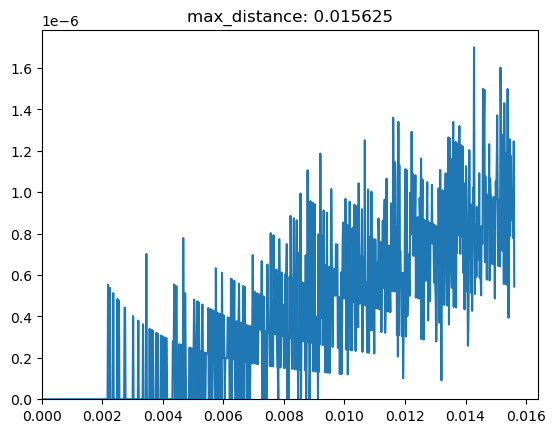

In [10]:
from matplotlib import animation

functions = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")

keys = sorted(functions.keys())

fig, ax = plt.subplots()

plot = ax.plot(functions[keys[0]][0], functions[keys[0]][1])[0]
ax.set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

def update(frame):
    # determine maximum for plot scaling
    maxx = max(functions[keys[frame]][0])
    maxy = max(functions[keys[frame]][1])
    
    ax.set(xlim=[0, maxx * 1.05], ylim=[0, maxy * 1.05])
    ax.set_title("max_distance: " + keys[frame])
    plot.set_xdata(functions[keys[frame]][0])
    plot.set_ydata(functions[keys[frame]][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_UTK_Heck.mp4", dpi=600)

In [17]:
# Plotting of compound animation
from matplotlib import animation

LINEWIDTH = 0.6

utk_rdfdata = load_utk_rdfseries("../result_data/rdffiles_Heck_UTK/")
psa_rdfdata = load_heck_pcfseries("../result_data/pcffiles_PSA/")
utk_pcfdata = load_pcfseries("../result_data/pcffiles_UTK/")

utk_rdf_keys = sorted(utk_rdfdata.keys())
psa_keys = sorted(psa_rdfdata.keys())
utk_pcf_keys = sorted(utk_pcfdata.keys())

assert utk_rdf_keys == psa_keys == utk_pcf_keys

fig, ax = plt.subplots(2,2, sharex=False, sharey=False)
fig.tight_layout()

plot_utk_rdf = ax[0][0].plot(utk_rdfdata[utk_rdf_keys[0]][0], utk_rdfdata[utk_rdf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_psa_rdf = ax[0][1].plot(psa_rdfdata[psa_keys[0]][0], psa_rdfdata[psa_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[0][1].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

plot_utk_pcf = ax[1][0].plot(utk_pcfdata[utk_pcf_keys[0]][0], utk_pcfdata[utk_pcf_keys[0]][1], linewidth=LINEWIDTH)[0]
ax[1][0].set(xlim=[0, 0.02], ylim=[-0.1, 0.1])

ax[1][1].set_axis_off()
ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[0])

def update(frame):
    # determine maximum for plot scaling
    maxx_0 = max(utk_rdfdata[utk_rdf_keys[frame]][0])
    maxy_0 = max(utk_rdfdata[utk_rdf_keys[frame]][1])

    maxx_1 = max(psa_rdfdata[psa_keys[frame]][0])
    maxy_1 = max(psa_rdfdata[psa_keys[frame]][1])

    maxx_2 = max(utk_pcfdata[utk_pcf_keys[frame]][0])
    maxy_2 = max(utk_pcfdata[utk_pcf_keys[frame]][1])
    
    ax[0][0].set(xlim=[0, maxx_0 * 1.05], ylim=[0, maxy_0 * 1.05])
    ax[0][0].set_title("Heck in UTK")
    
    plot_utk_rdf.set_xdata(utk_rdfdata[utk_rdf_keys[frame]][0])
    plot_utk_rdf.set_ydata(utk_rdfdata[utk_rdf_keys[frame]][1])

    ################
    
    ax[0][1].set(xlim=[0, maxx_1 * 1.05], ylim=[0, maxy_1 * 1.05])
    ax[0][1].set_title("PSA implementation")
    
    plot_psa_rdf.set_xdata(psa_rdfdata[psa_keys[frame]][0])
    plot_psa_rdf.set_ydata(psa_rdfdata[psa_keys[frame]][1])

    ################    
    
    ax[1][0].set(xlim=[0, maxx_2 * 1.05], ylim=[0, maxy_2 * 1.05])
    ax[1][0].set_title("UTK implementation")
    
    plot_utk_pcf.set_xdata(utk_pcfdata[utk_pcf_keys[frame]][0])
    plot_utk_pcf.set_ydata(utk_pcfdata[utk_pcf_keys[frame]][1])

    ################
    ax[1][1].clear()
    ax[1][1].set_axis_off()
    ax[1][1].set(xlim=[0, 1.0], ylim=[0, 1.0])
    ax[1][1].text(0.4, 0.4, "max_distance: \n" + utk_pcf_keys[frame])

maxkeylen = max(max(len(utk_rdf_keys), len(psa_keys)), len(utk_pcf_keys))

anim = animation.FuncAnimation(fig=fig, func=update, frames=maxkeylen, interval=300)
anim.save("animation_compound.mp4", dpi=600, writer="ffmpeg")

NameError: name 'load_utk_rdfseries' is not defined

In [19]:

spectrum = load_spectrum_to_matrix("../cmake-build-debug/spectrum.txt")

(px, py) = load_pointset("../result_data/sampled.txt")

(pcfx, pcfy) = load_heck_pcf("../psa/cmake-build-debug/sampled_rdf.txt")

(specxs, specys) = load_radspec("../cmake-build-debug/radSpec.txt")

fig, ax = plt.subplots(2, 2)
fig.tight_layout() 
plt.rcParams['figure.dpi'] = 800


ax[0][0].set_aspect(1.0)
ax[0][0].scatter(px, py, s=0.2)
ax[0][0].set_title("Points")

ax[0][1].imshow(spectrum, cmap="gray")
ax[0][1].set_title("Spectrum")

ax[1][0].plot(pcfx, pcfy, linewidth=0.5)
ax[1][0].set_title("PCF")

ax[1][1].plot(specxs, specys, linewidth=0.5)
ax[1][1].set_title("Power spectrum")
plt.savefig("fullfig_generated_utk.png", dpi=800)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../cmake-build-debug/spectrum.txt'

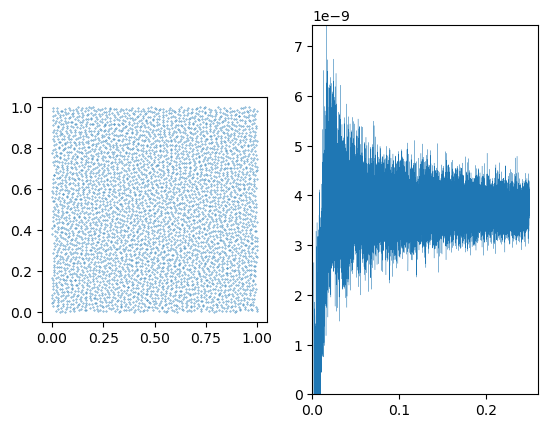

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].set_aspect(1)
#ax[1].set_aspect(1.0)

pointset = load_pointset("../utk/cmake-build-debug/src/samplers/points.txt")
ax[0].scatter(pointset[0], pointset[1], s=0.1)

rdf = load_radspec("../utk/cmake-build-debug/src/samplers/rdf.txt")
ax[1].set(xlim=[0.0, 0.26], ylim=[min(rdf[1]), max(rdf[1])])
ax[1].plot(rdf[0], rdf[1], linewidth = 0.2)

plt.rcParams['figure.dpi'] = 400
plt.show()

In [10]:
import os
import matplotlib.pyplot as plt
from matplotlib import animation


def generate_forceseries(path: str):
    forces = []
    for i in range(len(os.listdir(path))):
        with open(os.path.join(path, "force" + str(i) + ".dat"), 'r') as forcefile:
            xs = []
            ys = []
            for line in forcefile.readlines():
                x, y = line.split(" ")
                y.replace("\n", "")
                xs.append(float(x))
                ys.append(float(y))
        forces.append((xs, ys)) 
    return forces

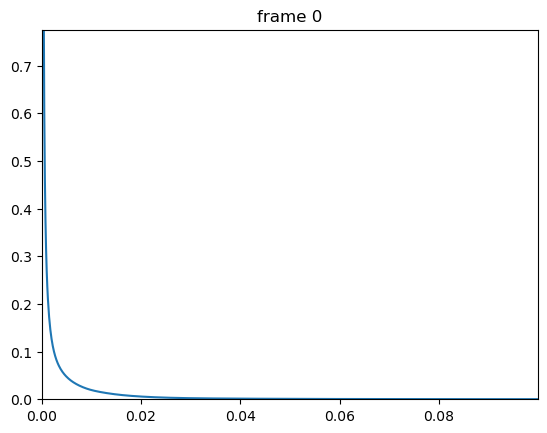

In [11]:
forces = generate_forceseries("../result_data/forces_unmodified")

fig, ax = plt.subplots()
plot = plt.plot(forces[0][0], forces[0][1])[0]

def update(frame):
    maxx = max(forces[frame][0])
    maxy = max(forces[frame][1])
    
    ax.set(xlim=[0.0, maxx * 0.2], ylim=[0.0, maxy * 0.2])
    ax.set_title("frame " + str(frame))
    plot.set_xdata(forces[frame][0])
    plot.set_ydata(forces[frame][1])

anim = animation.FuncAnimation(fig=fig, func=update, frames=len(forces), interval=300)
anim.save("animation_forces_16384.mp4", dpi=600, writer="ffmpeg")

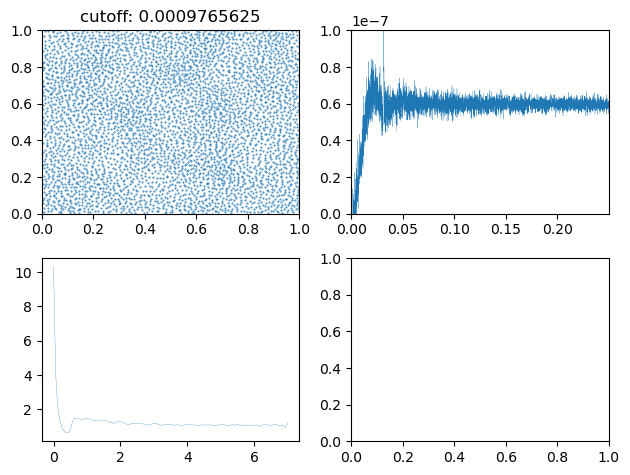

In [18]:
def load_pointset_series(path: str):
    pointsets = {}
    for pointset in os.listdir(path):
        key = float(pointset.replace("pointset_", "").replace(".txt", ""))
        pointset = load_pointset(os.path.join(path, pointset))
        pointsets[key] = pointset

    return pointsets

def load_radspec_series(path: str):
    radspecs = {}
    for radspec in os.listdir(path):
        key = float(radspec.replace("pointset_", "").replace(".rdf", ""))
        radspec = load_radspec(os.path.join(path, radspec))
        radspecs[key] = radspec

    return radspecs
        

pcfs = load_utk_rdfseries("../result_data/pointset_series/rdffiles/")
pointsets = load_pointset_series("../result_data/pointset_series/pointsets/")
radspecs = load_radspec_series("../result_data/pointset_series/radspecs/")

keys = sorted(pointsets.keys())

fig, ax = plt.subplots(2,2)
pointplot = ax[0][0].scatter(pointsets[keys[0]][0], pointsets[keys[0]][1], s=0.2)
rdfplot = ax[0][1].plot(pcfs[str(keys[0])][0],pcfs[str(keys[0])][1], linewidth=0.2)[0]
radspecplot = ax[1][0].plot(radspecs[keys[0]][0], radspecs[keys[0]][1], linewidth=0.2)[0]

fig.tight_layout()


def update(frame):

    ax[0][0].clear()
    pointplot = ax[0][0].scatter(pointsets[keys[frame]][0], pointsets[keys[frame]][1], s=0.2)
    ax[0][0].set(xlim=[0, 1], ylim=[0.0, 1.0])
    ax[0][0].set_title("cutoff: " + str(keys[frame]))

    maxx = float(max(pcfs[str(keys[frame])][0]))
    maxy = float(max(pcfs[str(keys[frame])][1]))
    
    rdfplot.set_xdata(pcfs[str(keys[frame])][0])
    rdfplot.set_ydata(pcfs[str(keys[frame])][1])

    ax[0][1].set(xlim=[0, maxx], ylim=[0.0, 1.0e-7])
    #ax[1].set_xbound(lower=-0.01, upper=maxx) 
    #ax[1].set_ybound(lower=0, upper=maxx)

    radspecplot.set_xdata(radspecs[keys[frame]][0])
    radspecplot.set_ydata(radspecs[keys[frame]][1])


anim = animation.FuncAnimation(fig=fig, func=update, frames=len(keys), interval=300)
anim.save("animation_cutoffs_with_radspec.mp4", dpi=600, writer="ffmpeg")

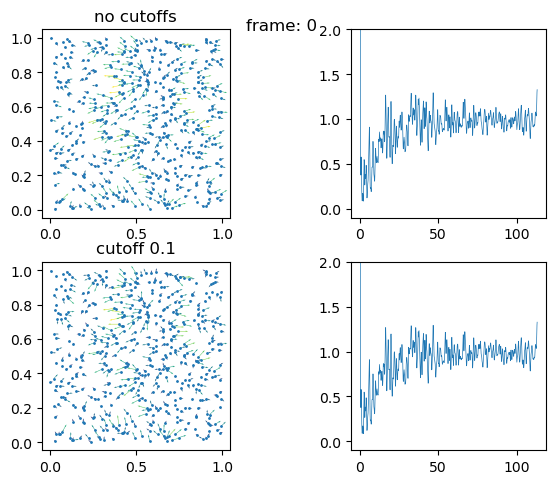

In [28]:
from matplotlib import animation


def load_gradient(path: str):
    xs, ys, us, vs, cs = [], [], [], [], []
    with open(path, 'r') as gradfile:
        for line in gradfile.readlines():
            x, y, u, v = line.split(" ")
            x = float(x)
            y = float(y)
            u = float(u)
            v = float(v)
            
            xs.append(x)
            ys.append(y)
            us.append(u)
            vs.append(v)
            cs.append(np.hypot(u,v))
    
    return (xs, ys, us, vs, cs)
            

fig, ax = plt.subplots(2,2)
fig.tight_layout()

ax[0][0].set_xlim([-0.1, 1.1])
ax[0][0].set_ylim([-0.1, 1.1])
ax[1][0].set_xlim([-0.1, 1.1])
ax[1][0].set_ylim([-0.1, 1.1])

def update(frame):
    fig.suptitle(f'frame: {str(frame)}')

    for axis in ax:
        for a in axis:
            a.clear()
    
    ax[0][0].set_title('no cutoffs')

    
    (xs, ys, us, vs, cs) = load_gradient(f'../result_data/gradients_no_cutoff/forces_{str(min(222,frame))}.txt')
    ax[0][0].quiver(xs, ys, us, vs, cs)
    ax[0][0].scatter(xs, ys, s=1.0)
    ax[0][0].set_aspect(1.0)

    (radspec_x, radspec_y) = load_heck_pcf(f'../result_data/gradients_no_cutoff/pointset_{str(min(222,frame))}_rp.txt')
    radspec_y = scipy.ndimage.gaussian_filter(radspec_y, 2.0)
    ax[0][1].plot(radspec_x, radspec_y, linewidth=0.5)
    ax[0][1].set_ylim([-0.1, 2.0])
    ax[0][1].set_aspect(57)


    ax[1][0].set_title('cutoff 0.1')
    (xs, ys, us, vs, cs) = load_gradient(f'../result_data/gradients_cutoff_0.1/forces_{str(frame)}.txt')
    ax[1][0].quiver(xs, ys, us, vs, cs)
    ax[1][0].scatter(xs, ys, s=1.0)
    ax[1][0].set_aspect(1.0)

    (radspec_x, radspec_y) = load_heck_pcf(f'../result_data/gradients_cutoff_0.1/pointset_{str(frame)}_rp.txt')
    radspec_y = scipy.ndimage.gaussian_filter(radspec_y, 2.0)
    ax[1][1].plot(radspec_x, radspec_y, linewidth=0.5)
    ax[1][1].set_ylim([-0.1, 2.0])
    ax[1][1].set_aspect(57)
    
anim = animation.FuncAnimation(fig=fig, func=update, frames=258, interval=200)
anim.save("animation_gradients_combined.mp4", dpi=600, writer="ffmpeg")

In [34]:
def convert_to_pointset(path: str):
    xs, ys = [], []
    with open(path, 'r') as gradfile:
        for line in gradfile.readlines():
            x, y, _, _= line.split(" ")
            x = float(x)
            y = float(y)

            
            xs.append(x)
            ys.append(y)

    with open(path.replace('.txt', '') + '_pointset.txt', 'w') as pointsetfile:
        for i in range(len(xs)):
            pointsetfile.write(str(xs[i]) + " " + str(ys[i]) + "\n")

for i in range(258):
    print(f'converting file {i}')
    #convert_to_pointset(f'../result_data/gradients_no_cutoff/forces_{i}.txt')
    os.system('../psa/cmake-build-debug/psa --rp --raw ' + f'../utk/cmake-build-debug/src/samplers/pointset_{str(i)}.txt')
    os.system('mv ' + f'./pointset_{str(i)}_rp.txt' + ' ' + f'../utk/cmake-build-debug/src/samplers/')
    

converting file 0
Config file 'psa.cfg' not found. Using defaults.
converting file 1
Config file 'psa.cfg' not found. Using defaults.
converting file 2
Config file 'psa.cfg' not found. Using defaults.
converting file 3
Config file 'psa.cfg' not found. Using defaults.
converting file 4
Config file 'psa.cfg' not found. Using defaults.
converting file 5
Config file 'psa.cfg' not found. Using defaults.
converting file 6
Config file 'psa.cfg' not found. Using defaults.
converting file 7
Config file 'psa.cfg' not found. Using defaults.
converting file 8
Config file 'psa.cfg' not found. Using defaults.
converting file 9
Config file 'psa.cfg' not found. Using defaults.
converting file 10
Config file 'psa.cfg' not found. Using defaults.
converting file 11
Config file 'psa.cfg' not found. Using defaults.
converting file 12
Config file 'psa.cfg' not found. Using defaults.
converting file 13
Config file 'psa.cfg' not found. Using defaults.
converting file 14
Config file 'psa.cfg' not found. Using 

Cannot load '../utk/cmake-build-debug/src/samplers/pointset_223.txt'.
mv: cannot stat './pointset_223_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_224.txt'.
mv: cannot stat './pointset_224_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_225.txt'.
mv: cannot stat './pointset_225_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_226.txt'.
mv: cannot stat './pointset_226_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_227.txt'.
mv: cannot stat './pointset_227_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_228.txt'.
mv: cannot stat './pointset_228_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_229.txt'.
mv: cannot stat './pointset_229_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src

converting file 244
Config file 'psa.cfg' not found. Using defaults.
converting file 245
Config file 'psa.cfg' not found. Using defaults.
converting file 246
Config file 'psa.cfg' not found. Using defaults.
converting file 247
Config file 'psa.cfg' not found. Using defaults.
converting file 248
Config file 'psa.cfg' not found. Using defaults.
converting file 249
Config file 'psa.cfg' not found. Using defaults.
converting file 250
Config file 'psa.cfg' not found. Using defaults.
converting file 251
Config file 'psa.cfg' not found. Using defaults.
converting file 252
Config file 'psa.cfg' not found. Using defaults.
converting file 253
Config file 'psa.cfg' not found. Using defaults.
converting file 254
Config file 'psa.cfg' not found. Using defaults.
converting file 255
Config file 'psa.cfg' not found. Using defaults.
converting file 256
Config file 'psa.cfg' not found. Using defaults.
converting file 257
Config file 'psa.cfg' not found. Using defaults.


Cannot load '../utk/cmake-build-debug/src/samplers/pointset_244.txt'.
mv: cannot stat './pointset_244_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_245.txt'.
mv: cannot stat './pointset_245_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_246.txt'.
mv: cannot stat './pointset_246_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_247.txt'.
mv: cannot stat './pointset_247_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_248.txt'.
mv: cannot stat './pointset_248_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_249.txt'.
mv: cannot stat './pointset_249_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src/samplers/pointset_250.txt'.
mv: cannot stat './pointset_250_rp.txt': No such file or directory
Cannot load '../utk/cmake-build-debug/src

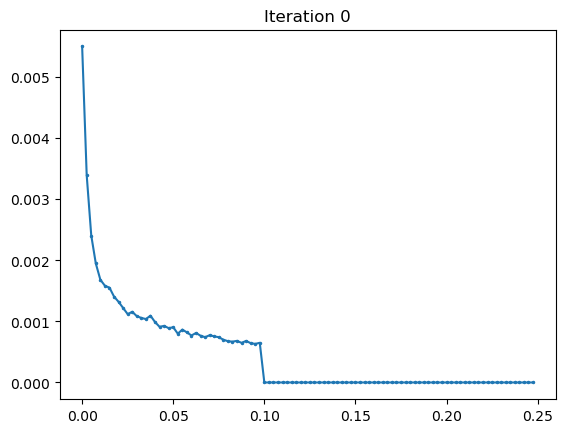

In [119]:
def load_histogram(path: str) -> [([float], [float])]:
    contributions = []
    with open(path, 'r') as histfile:
        for line in histfile.readlines():
            if ' ' in line:
                dist, force = line.split(' ')
                contributions[-1][0].append(float(dist))
                contributions[-1][1].append(float(force))
            else:
                contributions.append(([], []))
    return contributions


def fold_histogram(histogram_data: [([float], [float])], nbins: int):
    binsize = 0.25 / nbins
    bins = [0.0] * nbins
    
    for point_contrib in histogram_data:
        for i, dist in enumerate(point_contrib[0]):
            binidx = math.floor(dist / binsize)
            bins[binidx] += point_contrib[1][i]

    for i in range(len(bins)):
        bins[i] = bins[i] / float(len(histogram_data))
    
    return bins

fig, ax = plt.subplots()

def update(frame):
    hist = load_histogram(f'../utk/cmake-build-debug/src/samplers/contribution_histogram{frame}.hst')
    nbins = 100
    bins = fold_histogram(hist, nbins)
    ax.clear()
    ax.set_title(f'Iteration {frame}')
    ax.plot([(0.25 / nbins) * i for i in range(nbins)], bins, linestyle = "-", marker = 'o', markersize=1.5)

anim = animation.FuncAnimation(fig=fig, func=update, frames=222, interval=400)
anim.save("average_forces_cutoff_0.1.mp4", dpi=300, writer="ffmpeg")